# Calculus and Differential Equations

## Polynomials and calculus

A [polynomial](https://mathworld.wolfram.com/Polynomial.html) is a mathematical expression involving a sum of powers in one or more variables multiplied by coefficients. A polynomial in one variable (i.e., a univariate polynomial) with constant coefficients is given by

$$
a_n \, x^n + a_{n-1} \, x^{n-1} + \cdots + a_2 \, x^2 + a_1 \, x + a_0
$$

Calculus concerns the *differentiation* and *integration* of functions. Geometrically,

- the *derivative*, obtained by *differentiating*, of a function is its *gradient*
- the *integral*, obtained by *integrating*, of a function is the area that lies between the curve of the function and the $x$ axis, accounting for whether the curve lies above or below the axis

### Differentiation

For powers of a variable $x$, the rule for differentiation is to multiply by the power and reduce the power by 1, so that

$$
\frac{\mathrm{d}}{\mathrm{d}x}\,x^n = n \, x^{n-1}
$$

The [derivative](https://mathworld.wolfram.com/Derivative.html) of a function $f$ with respect to the variable $x$, denoted either $f'(x)$ or $\displaystyle\frac{\mathrm{d}f}{\mathrm{d}x}$, is defined as

$$
f'(x) \equiv \lim\limits_{h \to 0} \frac{f(x+h)-f(x)}{h}
$$

Derivatives of sums are equal to the sum of derivatives so that

$$
\{f + \cdots + h \}' = f' + \cdots + h'
$$

If $c$ is a constant,

$$
\{ c\,f \}' = c\,f'
$$

The *product rule for differentiation* states that
$\{ fg \}' = fg' + f'g$.
Since $\displaystyle\lim\limits_{h \to 0} f(x+h) = f(x)$,

$$
\begin{aligned}
\frac{\mathrm{d}}{\mathrm{d}x} \{ fg \}
& = \lim\limits_{h \to 0} \frac{f(x+h) g(x+h) - f(x) g(x)}{h} \\
& = \lim\limits_{h \to 0} \frac{f(x+h) g(x+h) -f(x+h) g(x) + f(x+h) g(x) - f(x) g(x)}{h} \\
& = \lim\limits_{h \to 0} f(x+h) \frac{g(x+h) - g(x)}{h}
  + \lim\limits_{h \to 0} \frac{f(x+h) - f(x)}{h}\, g(x) \\
& = f\frac{\mathrm{d} g}{\mathrm{d} x} + \frac{\mathrm{d} f}{\mathrm{d} x} g
\end{aligned}
$$

Derivatives of some simple functions are:

$$
\begin{aligned}
\{ e^x \}' & = e^x \\
\{ a^x \}' & = (\mathrm{ln}\,a)\,a^x \\
\{ \mathrm{ln}\,x \}' & = 1/x \\
\{ \sin x \}' & = \cos x \\
\{ \cos x \}' & = -\sin x
\end{aligned}
$$

### Integration

Integration is, roughly speaking, anti-differentiation, in the sense that first integrating and then differentiating yields the original function. For powers of a variable $x$, the rule for integration is to increase the power by 1 and divide by the new power, so that

$$
\int x^{n-1} \, \mathrm{d}x = \frac{x^n}{n}
$$

## Calculas symbolically

SymPy can perform differentiation and integration of symbolic functions.

$$
f(x) = (x^2 - 2 x)\,e^{3-x}
$$

In [1]:
import sympy

In [2]:
x = sympy.symbols('x')
f = (x**2 - 2*x)*sympy.exp(3-x)
fp = sympy.simplify(sympy.diff(f))

An expression for the derivative that `sympy.diff` returns is often not expressed in its simplest form, so we use the `sympy.simplify` routine.

We can compare whether the result is correct, compared to the derivative computed by hand:

In [3]:
fp2 = (2*x -2)*sympy.exp(3-x) - (x**2 - 2*x)*sympy.exp(3-x)
assert sympy.simplify(fp2 - fp) == 0

We can integrate the function, too:

In [4]:
F = sympy.integrate(f, x)
assert sympy.simplify(-x**2*sympy.exp(3-x) - F) == 0

The most important feature of SymPy is the ability to perform symbolic calculus &mdash; rather than the numerical calculus &mdash; and give exact (sometimes called *analytic*) solutions to calculus problems.

You can also evaluate SymPy expressions numerically. This is done using the `lamdify` routine from the `sympy.utilities` modules. This converts a SymPy expression to a numerical expression that uses the NumPy equivalents of the SymPy standard function to evaluate the expression numerically. The result is similar to defining a Python Lambda, hence the name.

In [5]:
from sympy.utilities import lambdify
lam_f = lambdify(x, f)
lam_fp = lambdify(x, fp)

import numpy as np
assert np.isclose(lam_f(4), 2.9430355293715387)
assert np.isclose(lam_fp(7), -0.4212596944408861)

## Solving equations

Many mathematical problems eventually reduce to solving an equation of the form $f(x)=0$, where $f$ is a function of a single variable $x$. Here, we try to find a value of $x$ for which the equation holds. The values of $x$ for which the equation holds are sometimes called *roots* of the equation.

We will use the function defined by

$$
f(x) = (x^2 - 2x)\,e^{3-x}
$$

which is defined for all real values of $x$ and has exactly two roots, one at $x = 0$ and one at $x = 2$.

The SciPy package contains routines for solving equations. The root finding routines can be found in the `optimize` module from the `scipy` package. If your equation is not in the form of $f(x) = 0$, then you will need to rearrange it so that this is the case.

In [6]:
from scipy import optimize

The Newton-Raphson method (Newton's method) and the secant method are good, standard root finding algorithms that can be applied in almost any situation. These are *iterative* methods that start with an approximation of the root and iteratively improve this approximation until it lies within a given tolerance.

For both the Newton-Raphson and secant methods, we use the `newton` routine from `optimize`. Both the secant method and the Newton-Raphson method require the function as the first argument, and the first approximation as the second argument. To use the Newton-Raphson method, we must provide the derivative of the function, using the `fprime` keyword argument.

In [7]:
assert optimize.newton(lam_f, 1., fprime=lam_fp) == 2.

To use the secant method, only the function is needed, but we must provide the first two approximations for the root; the second is provided as the `x1` keyword argument:

In [8]:
roots = optimize.newton(lam_f, 1., x1=1.5)
assert roots != 2.
assert np.isclose(roots, 2.)

Broadly speaking, root finding algorithms fall into two categories:

- algorithms that use information about the function's gradient at each iterate (Newton-Raphson, secant, Halley) and
- algorithms that require bounds on the location of a root (bisection method, regula-falsi, Brent).

The Newton-Raphson method, one of the first kind, for a function $f(x)$ with derivative $f'(x)$ and initial approximation $x0$ is defined iteratively using the formula

$$
x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}
$$

for each integer $i \geq 0$. Geometrically, this formula arises by considering the direction in which the gradient is negative (so the function is decreasing) if $f(x_i) \gt 0$ or positive (so the function is increasing) if $f(x_i) \lt 0$.

The second kind of algorithms are those for which a root is known to exist within a specified interval $a \leq x \leq b$. We can check whether a root lies within such an interval by checking that $f(a)$ and $f(b)$ have different signs, that is, one of $f(a) \lt 0 \lt f(b)$ or $f(b) \lt 0 \lt f(a)$ is true. (Provided, of course, that the function is *continuous*, which tends to be the case in practice.) &cdots; The basic premise is to split the interval between $a$ and $b$ at the mid-point and select the interval in which the function changes sign.

Brent's method is an improvement on the bisection method, and is available in the `optimize` module as `brentq`. It uses a combination of bisection and interpolation to quickly find the root of an equation:

In [9]:
roots = optimize.brentq(lam_f, 1.0, 3.0)
assert roots != 2.
assert np.isclose(roots, 2.)

## Integration numerically

Some integrals cannot be computed directly, using symbolic means, and instead have to be approximated numerically. One classic example of this is the Gaussian error function, which is defined as follows, and the integral that appear here cannot be evaluated symbolically:

$$
erf(x) = \frac{1}{\sqrt{\pi}} \int_{-x}^{x} e^{-t^2} \mathrm{d}t
$$

We use the `scipy.integrate` module, which contains several routines for computing numerical integrals.

In [10]:
from scipy import integrate

We need to define the integrand (the function that appears inside the integral) in Python:

In [11]:
def erf_integrand(t):
    return np.exp(-t**2)

There are two main routines in `scipy.integrate` for performing numerical integration (quadrature) that can be used. The first is the `quad` function, which uses QUADPACK to perform the integration, and the second is `quadrature`.

> `scipy.integrate.quadrature` is deprecated as of SciPy 1.12.0 and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.

The `quad` routine is a general-purpose integration tool. It expects three arguments, which are the function to be integrated (`erf_integrand`), the lower limit ($-1.0$), and the upper limit ($1.0$):

In [12]:
val, err = integrate.quad(erf_integrand, -1., 1.)
assert np.isclose(val, 1.493648265624854)
assert np.isclose(err, 1.6582826951881447e-14)

The first returned value is the value of the integral and the second is an estimate for the error.

Most numerical integration techniques follow the same basic procedure. First, we choose points $x_i$ for $i = 1, 2, \dots, n$ in the region of integration, and then use these values and the values $f(x_i)$ to approximate the integral. For example, with the trapezium rule, we approximate the integral by

$$
\int_{a}^{b} f(x) \mathrm{d}x \approx
\frac{h}{2} \left( f(a)+f(b)+2 \sum_{j=1}^{n-1}f(x_i) \right)
$$

where $a \lt x_1 \lt x_2 \lt \dots \lt x_{n-1} \lt b$, and $h$ is the (common) difference between adjacent $x_i$ values, including the end points $a$ and $b$, i.e., $h = (b-a)/n$.

The routines mentioned in this section require the integrand function to be known, which is not always the case. Instead, it might be the case that we know a number of pairs `(x,y)` with $y = f(x)$, but we don't know the function $f$ to evaluate at additional points. In this case, we can use one of the sampling quadrature techniques from `scipy.integrate`.

- the `romb` routine that follows Romberg integration
- the `trapz` routine that follows the trapezium rule
- the `simps` routine that follows the Simpson's rule

If the number of known points is very large and all points are equally spaced, we can use Romberg integration for a good approximation of the integral.

## Differentiation numerically

The temperature of a body cools at a rate proportional to the current temperature. Mathematically, this means that we can write the derivative of the temperature $T$ of the body at time $t \gt 0$ using the differential equation

$$
\frac{\mathrm{d}T}{\mathrm{d}t} = -kT
$$

where $k$ is a positive constant that determines the rate of cooling.

A general (first order) differential equation has the form

$$
\frac{\mathrm{d}y}{\mathrm{d}t} = f(t, y)
$$

where $f$ is some function of $t$ (the independent variable) and $y$ (the dependent variable). The routines for solving differential equations in the SciPy package requires:

- the function $f$
- an initial value $y_0$
- the range of $t$ values where we need to compute the solution

For the cooling equation, let $k=0.2$ and the initial temperature $T_0 = 50$. Then the equation can be written as

$$
\begin{aligned}
f(t, T) & = -0.2\,T \\
T_0 & = 50.0
\end{aligned}
$$

Let's find the solution for $0 \leq t \leq 5$.

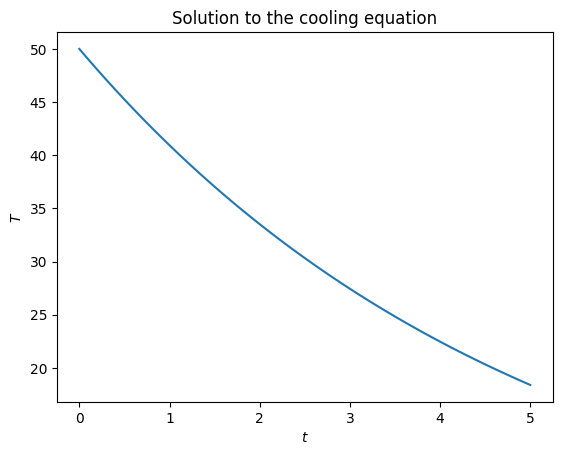

In [15]:
def f(t, T):
    return -0.2*T

T0 = np.array([50.0])   # an array for technical reasons
t_range = (0, 5)

ivp_sol = integrate.solve_ivp(f, t_range, T0, max_step=0.1)
ivp_t = ivp_sol.t
ivp_T = ivp_sol.y[0,:]

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(ivp_t, ivp_T)
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$T$")
ax.set_title("Solution to the cooling equation");

However, the cooling equation, however, can be solved analytically.

1. rearrange the equation to separate $\mathrm{d}T$ and $\mathrm{d}t$ on opposite sides:
   $$\frac{\mathrm{d}T}{T} = -k\,\mathrm{d}t$$
2. integrate both sides:
   $$
   \begin{aligned}
   \int\left(\frac{1}{T}\right) \mathrm{d}T & = \int -k\, \mathrm{d}t \\ \\
   \mathrm{ln} |T| & = -kt + C
   \end{aligned}
   $$
3. solve for $T$:
   $$
   \begin{aligned} |T|
   & = e^{-kt + C} \\
   & = e^C \times e^{-kt}\\
   & = T_0\, e^{-kt}
   \end{aligned}
   $$
4. since $T \geq 0$, the solution is:
   $$
   T(t) = T_0\,e^{-kt}
   $$

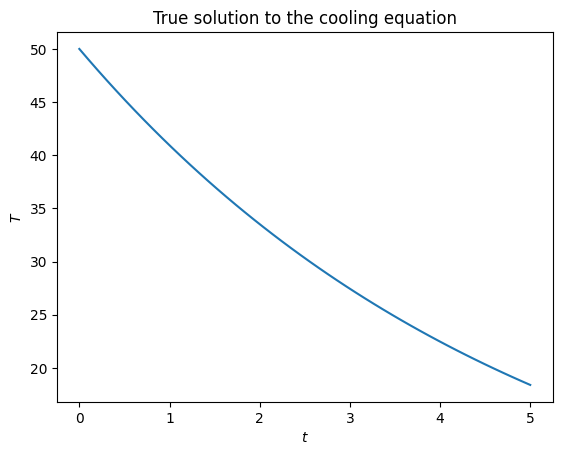

In [16]:
def true_solution(t):
    return 50.*np.exp(-0.2*t)

true_t = np.linspace(0, 5)
true_T = true_solution(t)

fig, ax = plt.subplots()
ax.plot(true_t, true_T)
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$T$")
ax.set_title("True solution to the cooling equation");

Let's compare the approximate solution with `scipy.integrate.solve_ivp` and the true solution.

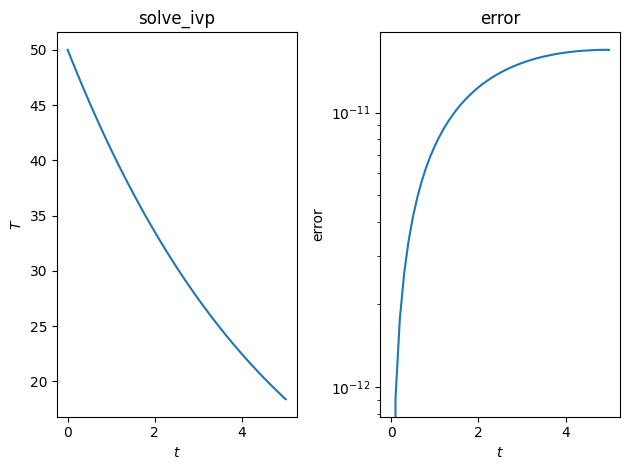

In [17]:
err = np.abs(ivp_T - true_solution(ivp_t))

fig, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True)

ax1.plot(ivp_t, ivp_T)
ax1.set_xlabel(r"$t$")
ax1.set_ylabel(r"$T$")
ax1.set_title("solve_ivp")

ax2.semilogy(ivp_t, err)
ax2.set_xlabel(r"$t$")
ax2.set_ylabel("error")
ax2.set_title("error");

The left-hand plot shows decreasing temperature over time, while the right-hand plot shows that the error increases as we move away from the known value given by the initial condition.